In [1]:

pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


In [2]:
import os
import cv2 as cv


In [1]:
import os
import cv2
import pandas as pd
import numpy as np

def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = os.path.join(folder_path, filename)
        # if img is not None:
        #     img = cv2.resize(img, (227, 227))  # Resize the images to match the input shape of AlexNet
        #     img=np.array(img)
        images.append(img)
        labels.append(label)
    return images, labels

# Define the two folders containing the images and their corresponding labels
folder_path_classA = r"C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW"
folder_path_classB = r"C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE"

# Load images and labels for classA
images_classA, labels_classA = load_images_from_folder(folder_path_classA, label="Raw")

# Load images and labels for classB
images_classB, labels_classB = load_images_from_folder(folder_path_classB, label="Ripe")

# Combine the data from both classes into a single DataFrame
data = {
    "image": images_classA + images_classB,
    "label": labels_classA + labels_classB
}

df = pd.DataFrame(data)

# Shuffle the DataFrame (optional)
df = df.sample(frac=1).reset_index(drop=True)

# Now, the DataFrame 'df' contains the image data and corresponding labels from both folders.
# You can use this DataFrame for further processing or training your model.


In [2]:
df

,image,label
0,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
1,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
2,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
3,C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...,Raw
4,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
...,...,...
1299,C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...,Raw
1300,C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...,Raw
1301,C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...,Ripe
1302,C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...,Raw


In [3]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the DataFrame
df["encoded_label"] = label_encoder.fit_transform(df["label"])

print(df)


                                                  image label  encoded_label
0     C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
1     C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
2     C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
3     C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0
4     C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
...                                                 ...   ...            ...
1299  C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0
1300  C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0
1301  C:\Users\GMRIT\Desktop\pineapple577\DATA\RIPE\...  Ripe              1
1302  C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0
1303  C:\Users\GMRIT\Desktop\pineapple577\DATA\RAW\r...   Raw              0

[1304 rows x 3 columns]


In [4]:
# earlystopping = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.001,
#     # patience=2,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
# )

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
def AlexNet(input_shape, num_classes):
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(layers.BatchNormalization())

    # Layer 2
    model.add(layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(layers.BatchNormalization())

    # Layer 3
    model.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    # Layer 4
    model.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    # Layer 5
    model.add(layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(layers.BatchNormalization())

    # Flatten the output for fully connected layers
    model.add(layers.Flatten())

    # Layer 6
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Layer 7
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model

# Define input shape and number of classes
input_shape = (227, 227, 3)  # Adjust input shape according to your images
num_classes = 1  # Adjust the number of classes based on your dataset

# Create the AlexNet model
model = AlexNet(input_shape, num_classes)

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                      

In [21]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [6]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [4]:
def load_and_preprocess_image(image_path, image_width, image_height):
    image = Image.open(image_path)
    image = image.resize((image_width, image_height))
    image_array = np.array(image) / 255.0
    return image_array

In [16]:
X = np.array([load_and_preprocess_image(str(path), 227,227) for path in df['image']])
y = df['encoded_label'] 

In [24]:

model.fit(X,y, batch_size=100, epochs=20, validation_split=0.2)


Epoch 1/20
11/11 [==============================] - 36s 3s/step - loss: 0.2571 - accuracy: 0.8926 - val_loss: 1.2662 - val_accuracy: 0.8659
Epoch 2/20
11/11 [==============================] - 27s 2s/step - loss: 0.2456 - accuracy: 0.8849 - val_loss: 1.0865 - val_accuracy: 0.8582
Epoch 3/20
11/11 [==============================] - 27s 2s/step - loss: 0.2471 - accuracy: 0.8849 - val_loss: 1.7593 - val_accuracy: 0.8429
Epoch 4/20
11/11 [==============================] - 27s 2s/step - loss: 0.2352 - accuracy: 0.8945 - val_loss: 2.3357 - val_accuracy: 0.8621
Epoch 5/20
11/11 [==============================] - 27s 2s/step - loss: 0.2180 - accuracy: 0.8945 - val_loss: 1.4879 - val_accuracy: 0.8582
Epoch 6/20
11/11 [==============================] - 27s 2s/step - loss: 0.2388 - accuracy: 0.8878 - val_loss: 1.4298 - val_accuracy: 0.8544
Epoch 7/20
11/11 [==============================] - 27s 2s/step - loss: 0.2447 - accuracy: 0.8792 - val_loss: 1.2143 - val_accuracy: 0.8621
Epoch 8/20
11/11 [==

In [ ]:
model.save('ALEXORG_model1.h5')

In [11]:
import os

In [1]:
import os
import cv2
import pandas as pd
import numpy as np

def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = os.path.join(folder_path, filename)
        # if img is not None:
        #     img = cv2.resize(img, (227, 227))  # Resize the images to match the input shape of AlexNet
        #     img=np.array(img)
        images.append(img)
        labels.append(label)
    return images, labels

# Define the two folders containing the images and their corresponding labels
folder_path_classA = r"C:\Users\GMRIT\Desktop\pineapple577\results\DATA\RAW"
folder_path_classB = r"C:\Users\GMRIT\Desktop\pineapple577\results\DATA\RIPE"

# Load images and labels for classA
images_classA, labels_classA = load_images_from_folder(folder_path_classA, label="Raw")

# Load images and labels for classB
images_classB, labels_classB = load_images_from_folder(folder_path_classB, label="Ripe")

# Combine the data from both classes into a single DataFrame
data = {
    "image": images_classA + images_classB,
    "label": labels_classA + labels_classB
}

df = pd.DataFrame(data)

# Shuffle the DataFrame (optional)
df = df.sample(frac=1).reset_index(drop=True)

# Now, the DataFrame 'df' contains the image data and corresponding labels from both folders.
# You can use this DataFrame for further processing or training your model.


In [2]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the DataFrame
df["encoded_label"] = label_encoder.fit_transform(df["label"])

print(df)


                                                 image label  encoded_label
0    C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
1    C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
2    C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
3    C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
4    C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
..                                                 ...   ...            ...
140  C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
141  C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
142  C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1
143  C:\Users\GMRIT\Desktop\pineapple577\results\DA...   Raw              0
144  C:\Users\GMRIT\Desktop\pineapple577\results\DA...  Ripe              1

[145 rows x 3 columns]


In [7]:
Xt = np.array([load_and_preprocess_image(str(path), 227,227) for path in df['image']])
yt = df['encoded_label'] 

In [8]:
from tensorflow.keras.models import load_model

# Load the model from the H5 file
loaded_model = load_model('ALEXORG_model1.h5')

# Now, you can use the loaded_model to make predictions on new data
# For example:
import numpy as np

# Assuming you have new data stored in the 'new_data' variable
predictions = loaded_model.predict(Xt)

# 'predictions' will contain the model's output for the new data
# You can now use 'predictions' for further processing or analysis


5/5 [==============================] - 1s 132ms/step


In [9]:


print(predictions)
predictions.size

[[9.98411715e-01]
 [4.81228679e-02]
 [1.00000000e+00]
 [5.57573709e-10]
 [1.00000000e+00]
 [2.25458324e-23]
 [9.89529550e-01]
 [5.76694629e-06]
 [9.99967396e-01]
 [1.77117336e-33]
 [5.19060344e-02]
 [9.49847400e-01]
 [7.74304152e-01]
 [4.69384879e-01]
 [8.79338530e-15]
 [6.37422233e-12]
 [1.08105246e-21]
 [9.80853140e-01]
 [9.82488215e-01]
 [9.56393600e-01]
 [9.99913573e-01]
 [1.19650751e-01]
 [6.09117448e-01]
 [3.61382306e-01]
 [9.99999821e-01]
 [1.12984355e-09]
 [9.87226546e-01]
 [5.45222406e-07]
 [1.00000000e+00]
 [9.85030949e-01]
 [3.01131345e-02]
 [9.94671702e-01]
 [6.54800236e-01]
 [9.99792576e-01]
 [9.68874199e-04]
 [9.99960363e-01]
 [5.04617008e-11]
 [6.09117448e-01]
 [9.97938156e-01]
 [9.97487962e-01]
 [7.31637537e-01]
 [9.95995045e-01]
 [7.75316596e-01]
 [1.06333643e-10]
 [7.59523174e-12]
 [1.13960137e-33]
 [2.17215259e-07]
 [4.44824807e-02]
 [1.23530599e-08]
 [4.16177227e-06]
 [8.51360738e-01]
 [9.90446746e-01]
 [9.74647939e-01]
 [8.18841100e-01]
 [6.09117448e-01]
 [8.631761

145

In [10]:
from sklearn.metrics import classification_report

In [27]:
# Set the threshold value
threshold = 0.00000000001

# Apply thresholding to convert to binary targets
pred = (predictions > threshold).astype(int)

print("Continuous Targets:", predictions)
print("Binary Targets:", pred)


Continuous Targets: [[9.98411715e-01]
 [4.81228679e-02]
 [1.00000000e+00]
 [5.57573709e-10]
 [1.00000000e+00]
 [2.25458324e-23]
 [9.89529550e-01]
 [5.76694629e-06]
 [9.99967396e-01]
 [1.77117336e-33]
 [5.19060344e-02]
 [9.49847400e-01]
 [7.74304152e-01]
 [4.69384879e-01]
 [8.79338530e-15]
 [6.37422233e-12]
 [1.08105246e-21]
 [9.80853140e-01]
 [9.82488215e-01]
 [9.56393600e-01]
 [9.99913573e-01]
 [1.19650751e-01]
 [6.09117448e-01]
 [3.61382306e-01]
 [9.99999821e-01]
 [1.12984355e-09]
 [9.87226546e-01]
 [5.45222406e-07]
 [1.00000000e+00]
 [9.85030949e-01]
 [3.01131345e-02]
 [9.94671702e-01]
 [6.54800236e-01]
 [9.99792576e-01]
 [9.68874199e-04]
 [9.99960363e-01]
 [5.04617008e-11]
 [6.09117448e-01]
 [9.97938156e-01]
 [9.97487962e-01]
 [7.31637537e-01]
 [9.95995045e-01]
 [7.75316596e-01]
 [1.06333643e-10]
 [7.59523174e-12]
 [1.13960137e-33]
 [2.17215259e-07]
 [4.44824807e-02]
 [1.23530599e-08]
 [4.16177227e-06]
 [8.51360738e-01]
 [9.90446746e-01]
 [9.74647939e-01]
 [8.18841100e-01]
 [6.0911

In [28]:
# Create a classification report
report = classification_report(yt, pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.88      0.29      0.44        51
           1       0.72      0.98      0.83        94

    accuracy                           0.74       145
   macro avg       0.80      0.64      0.64       145
weighted avg       0.78      0.74      0.69       145



In [29]:
predict = loaded_model.predict(np.array([load_and_preprocess_image(str(r"C:\Users\GMRIT\Desktop\pineapple577\ripe.jpg"), 227,227)]))


1/1 [==============================] - 0s 201ms/step


In [30]:
predict

array([[0.5355567]], dtype=float32)

In [31]:
pip install visualkeras


Note: you may need to restart the kernel to use updated packages.


Keyring is skipped due to an exception: 'keyring.backends'


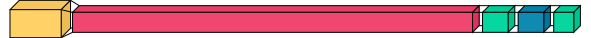

In [32]:
import visualkeras
visualkeras.layered_view(model)

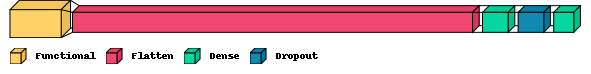

In [33]:
visualkeras.layered_view(model, legend=True) # without custom font

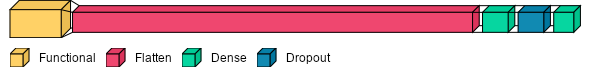

In [34]:
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font) # selected font

In [35]:
# Save the model summary to a text file
with open('ALEXORG_model_summary.txt', 'w') as f:
    loaded_model.summary(print_fn=lambda x: f.write(x + '\n'))

print("Model summary saved to 'inception_model_summary.txt'.")

Model summary saved to 'inception_model_summary.txt'.
